# Reaction-Diffusion Equation (Grey-Scott Model)

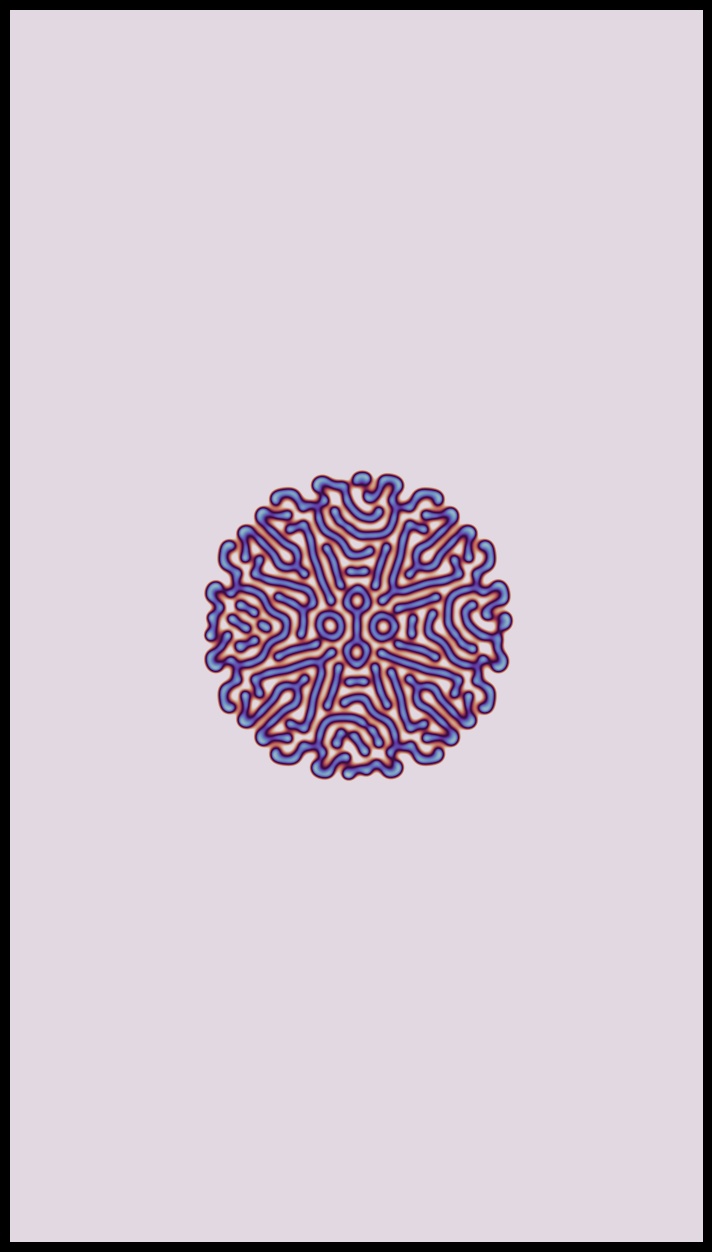

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# parameters
N = 1000  # Keep the original value
F = 0.035
k = 0.06
Du = 0.21
Dv = 0.105
# F = 0.03
# k = 0.062
# Du = 0.41
# Dv = 0.301
tend = 100000
dt = 0.05
total_frames = 900  # 30 seconds at 30 fps

contrast_vmin = 0.2
contrast_vmax = 0.8

# start arrays
# Set the aspect ratio to 9:16 by adjusting the shape
height = N
width = int(N * 9 / 16)
U = np.ones((height, width))
V = np.zeros((height, width))

# Initial Value Boxes (20x20 in middle)
low_height = int((height / 2) - 10)
high_height = int((height / 2) + 10) + 1
low_width = int((width / 2) - 10)
high_width = int((width / 2) + 10) + 1
U[low_height:high_height, low_width:high_width] = 0.5
V[low_height:high_height, low_width:high_width] = 0.25

# Random Noise
U += 0.01 * np.random.random((height, width))
V += 0.01 * np.random.random((height, width))


# Laplace function
def Laplace(f):
    return np.roll(f, 1, axis=0) + np.roll(f, -1, axis=0) + np.roll(f, 1, axis=1) + np.roll(f, -1, axis=1) - 4 * f

# Setup the figure
#fig, ax = plt.subplots(figsize=(9, 16))  # Adjust the figsize to 9:16 aspect ratio
#fig, ax = plt.subplots(figsize=(13, 6))

# Create a new figure
fig = plt.figure()

# Set figure width and height
fig.set_figwidth(9)
fig.set_figheight(16)

# Add a subplot to the figure
ax = fig.add_subplot(1, 1, 1)


# Set the facecolor to black
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
#img = ax.imshow(U, interpolation='bicubic', cmap='binary', vmin=0, vmax=1)
#img = ax.imshow(U, interpolation='bicubic', cmap='Greys', vmin=0, vmax=1)
img = ax.imshow(U, interpolation='bicubic', cmap='twilight', vmin=contrast_vmin, vmax=contrast_vmax)
ax.axis('off')

# Update function processes steps_per_frame each frame
steps_per_frame = tend // total_frames

def update(frame):
    global U, V
    for _ in range(steps_per_frame):
        dU = (Du * Laplace(U) - U * V * V + F * (1 - U)) * dt
        dV = (Dv * Laplace(V) + U * V * V - V * (F + k)) * dt
        U += dU
        V += dV
    img.set_data(U)
    return img,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=total_frames, blit=True)

# Save the animation
ani.save('reaction_diffusion.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

#Optimized Laplacian for faster processing

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation

# # Parameters
# N = 1000
# F = 0.035
# k = 0.06
# Du = 0.21
# Dv = 0.105
# tend = 1000000
# dt = 0.1  # Increased time step
# total_frames = 300  # Reduced number of frames

# # Increase contrast
# contrast_vmin = 0.2
# contrast_vmax = 0.8

# # Initialize U and V
# height = N
# width = int(N * 9 / 16)
# U = np.ones((height, width))
# V = np.zeros((height, width))

# # Add localized perturbation and random noise
# mid_h = height // 2
# mid_w = width // 2
# U[mid_h-10:mid_h+11, mid_w-10:mid_w+11] = 0.5
# V[mid_h-10:mid_h+11, mid_w-10:mid_w+11] = 0.25
# U += 0.01 * np.random.random((height, width))
# V += 0.01 * np.random.random((height, width))

# # Laplacian function optimized
# def laplace(Z):
#     return (np.roll(Z, 1, 0) + np.roll(Z, -1, 0) + np.roll(Z, 1, 1) + np.roll(Z, -1, 1) - 4 * Z)

# # Figure setup
# fig, ax = plt.subplots(figsize=(9, 16))
# fig.patch.set_facecolor('black')
# ax.set_facecolor('black')
# img = ax.imshow(U, interpolation='bicubic', cmap='twilight', vmin=contrast_vmin, vmax=contrast_vmax)
# ax.axis('off')

# # Update function
# def update(frame):
#     global U, V
#     for _ in range(tend // total_frames):
#         lapU = laplace(U)
#         lapV = laplace(V)
#         dU = Du * lapU - U * V**2 + F * (1 - U)
#         dV = Dv * lapV + U * V**2 - (F + k) * V
#         U += dU * dt
#         V += dV * dt
#     img.set_data(U)
#     return img,

# # Animation
# ani = animation.FuncAnimation(fig, update, frames=total_frames, blit=True)
# ani.save('reaction_diffusion_optimized.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# plt.show()
